<a href="https://colab.research.google.com/github/priyankasanapala/gittest/blob/master/Supply_Chain__Optimization_FMCG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supply Chain Optimization for a FMCG Company**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
#%matplotlib.inline()

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [ ]:
FMCG_df = pd.read_csv("/content/Data (1).csv")

In [ ]:
FMCG_df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

**Data Cleaning**

In [ ]:
FMCG_df.shape

(25000, 24)

In [ ]:
FMCG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
(FMCG_df.isnull().sum()/(len(FMCG_df)))*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [ ]:
FMCG_df.duplicated().sum()

0

In [ ]:
FMCG_df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [ ]:
## nearly half of the values is null --> discard the column wh_est_year
###drop these Ware_house_ID,WH_Manager_ID features because they are IDs and aren't helpful
FMCG_df.drop(columns=['Ware_house_ID','WH_Manager_ID','wh_est_year'],axis=1,inplace=True)

In [ ]:
FMCG_df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

**Check for missing values**

In [ ]:
##decent distribution, will fill the null values with mean
sns.displot(FMCG_df,x="workers_num",kind="kde")
plt.show()
FMCG_df['workers_num'].skew()

1.1237786487894297

In [ ]:
##only 1k missing -> replace null with mean- numerical column
FMCG_df['workers_num'] = FMCG_df['workers_num'].fillna(FMCG_df['workers_num'].mean())

In [ ]:
FMCG_df['workers_num'].mean()

28.974678167430238

In [ ]:
##only 1k missing -> replace null with mode- categorical column
#FMCG_df['approved_wh_govt_certificate'] = FMCG_df['approved_wh_govt_certificate'].fillna([FMCG_df['approved_wh_govt_certificate'].mode()[0]])
FMCG_df['approved_wh_govt_certificate'] = FMCG_df['approved_wh_govt_certificate'].fillna('C')

In [ ]:
FMCG_df['approved_wh_govt_certificate'].mode()[0]

'C'

In [ ]:
FMCG_df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

**Check for Outliners**

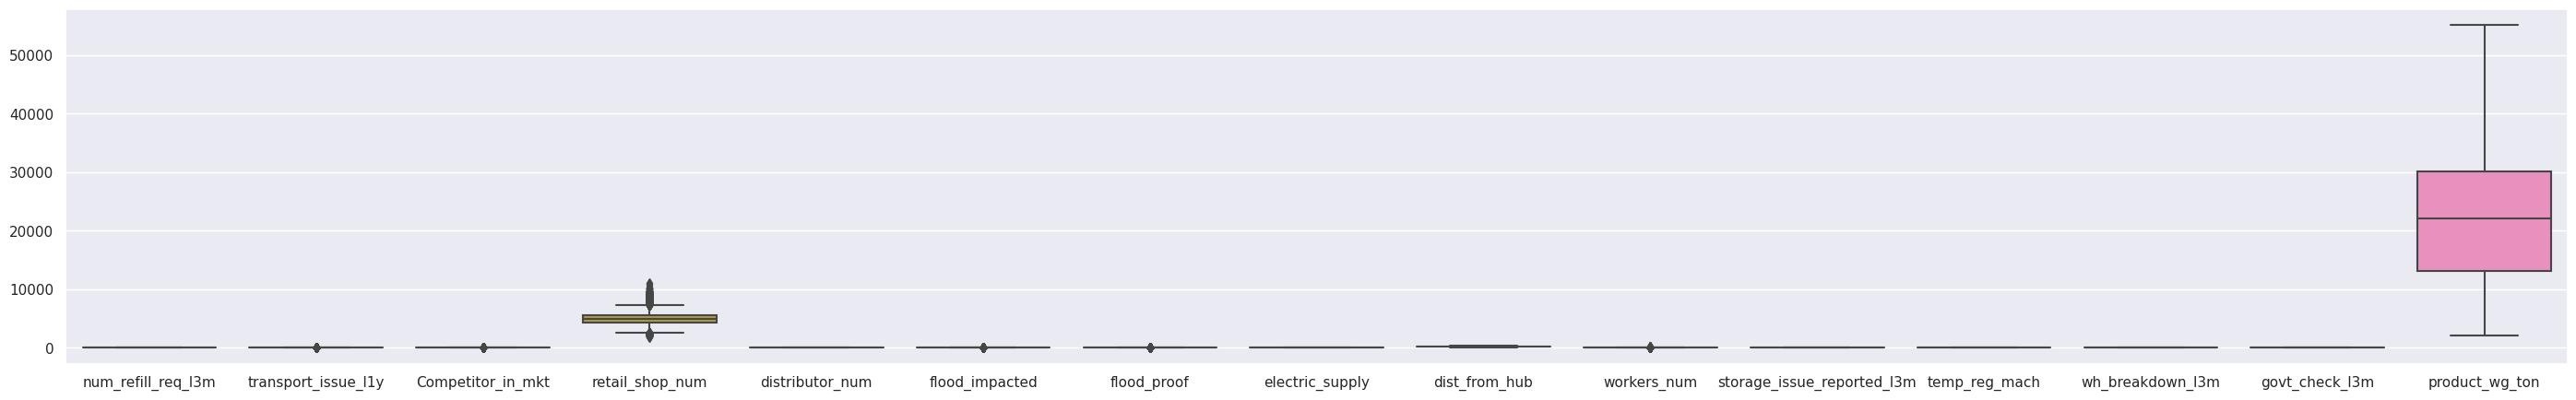

In [ ]:
##outliners- ["transport_issue_l1y",'Competitor_in_mkt','retail_shop_num','workers_num']
plt.figure(figsize=(35,5))
sns.boxplot(data=FMCG_df)
plt.show()

In [ ]:
##outliners handling- IQR method
cols=["transport_issue_l1y",'Competitor_in_mkt','retail_shop_num','workers_num']
for col in cols:
  q1=FMCG_df[col].quantile(0.25)
  q3=FMCG_df[col].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q3-1.5*iqr
  FMCG_df[col]=np.where(FMCG_df[col]>upper,upper,
                                    np.where(FMCG_df[col]<lower,lower,FMCG_df[col]
                                             )
                      )


In [ ]:
plt.figure(figsize=(25,5))
sns.boxplot(data=FMCG_df[["transport_issue_l1y",'Competitor_in_mkt','retail_shop_num','workers_num']])
plt.show()

In [ ]:
!pip install jupyter-summarytools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00


**EDA- Exploratory Data Analysis**

In [ ]:
##univariate analysis

from summarytools import dfSummary
dfSummary(FMCG_df)

*bivariate analysis*


In [ ]:
FMCG_df.groupby("zone")[["num_refill_req_l3m","product_wg_ton"]].sum()

num_refill_req_l3m  product_wg_ton
zone                                     
East                 1747         9747503
North               41814       228165823
South               25927       139540901
West                32738       175111596

<Axes: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

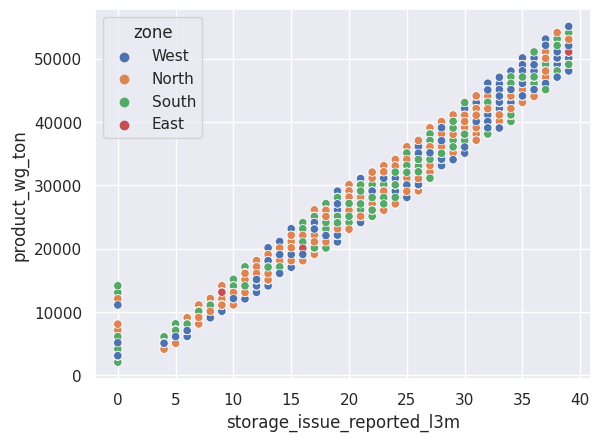

In [ ]:
#storage_issue_reported_l3m ,product_wg_ton - linear relation
# East zone has less number of storage issues
sns.scatterplot(x="storage_issue_reported_l3m",y="product_wg_ton",hue="zone",data=FMCG_df)


In [ ]:
#observations
##In all the zones - WH's are more in rural region
# north zone has highest number of WH's
#WH_capacity_size - mid > Large > small
# East zone has only mid size WH_capacity_size
#wh_owner_type - Company owned > Rented
#flood_impacted- least flood impact in East zone
#flood_proof - less no.of WH's are flood proof in al the zones, where as East one has least
#electric_supply- present in every zone
#temp_reg_mach- less no.of temp_reg_mach in every zone
#approved_wh_govt_certificate- 'C' certificate WH's  count is high in every zone ,where as  north zone has high number of 'C' certificate WH's

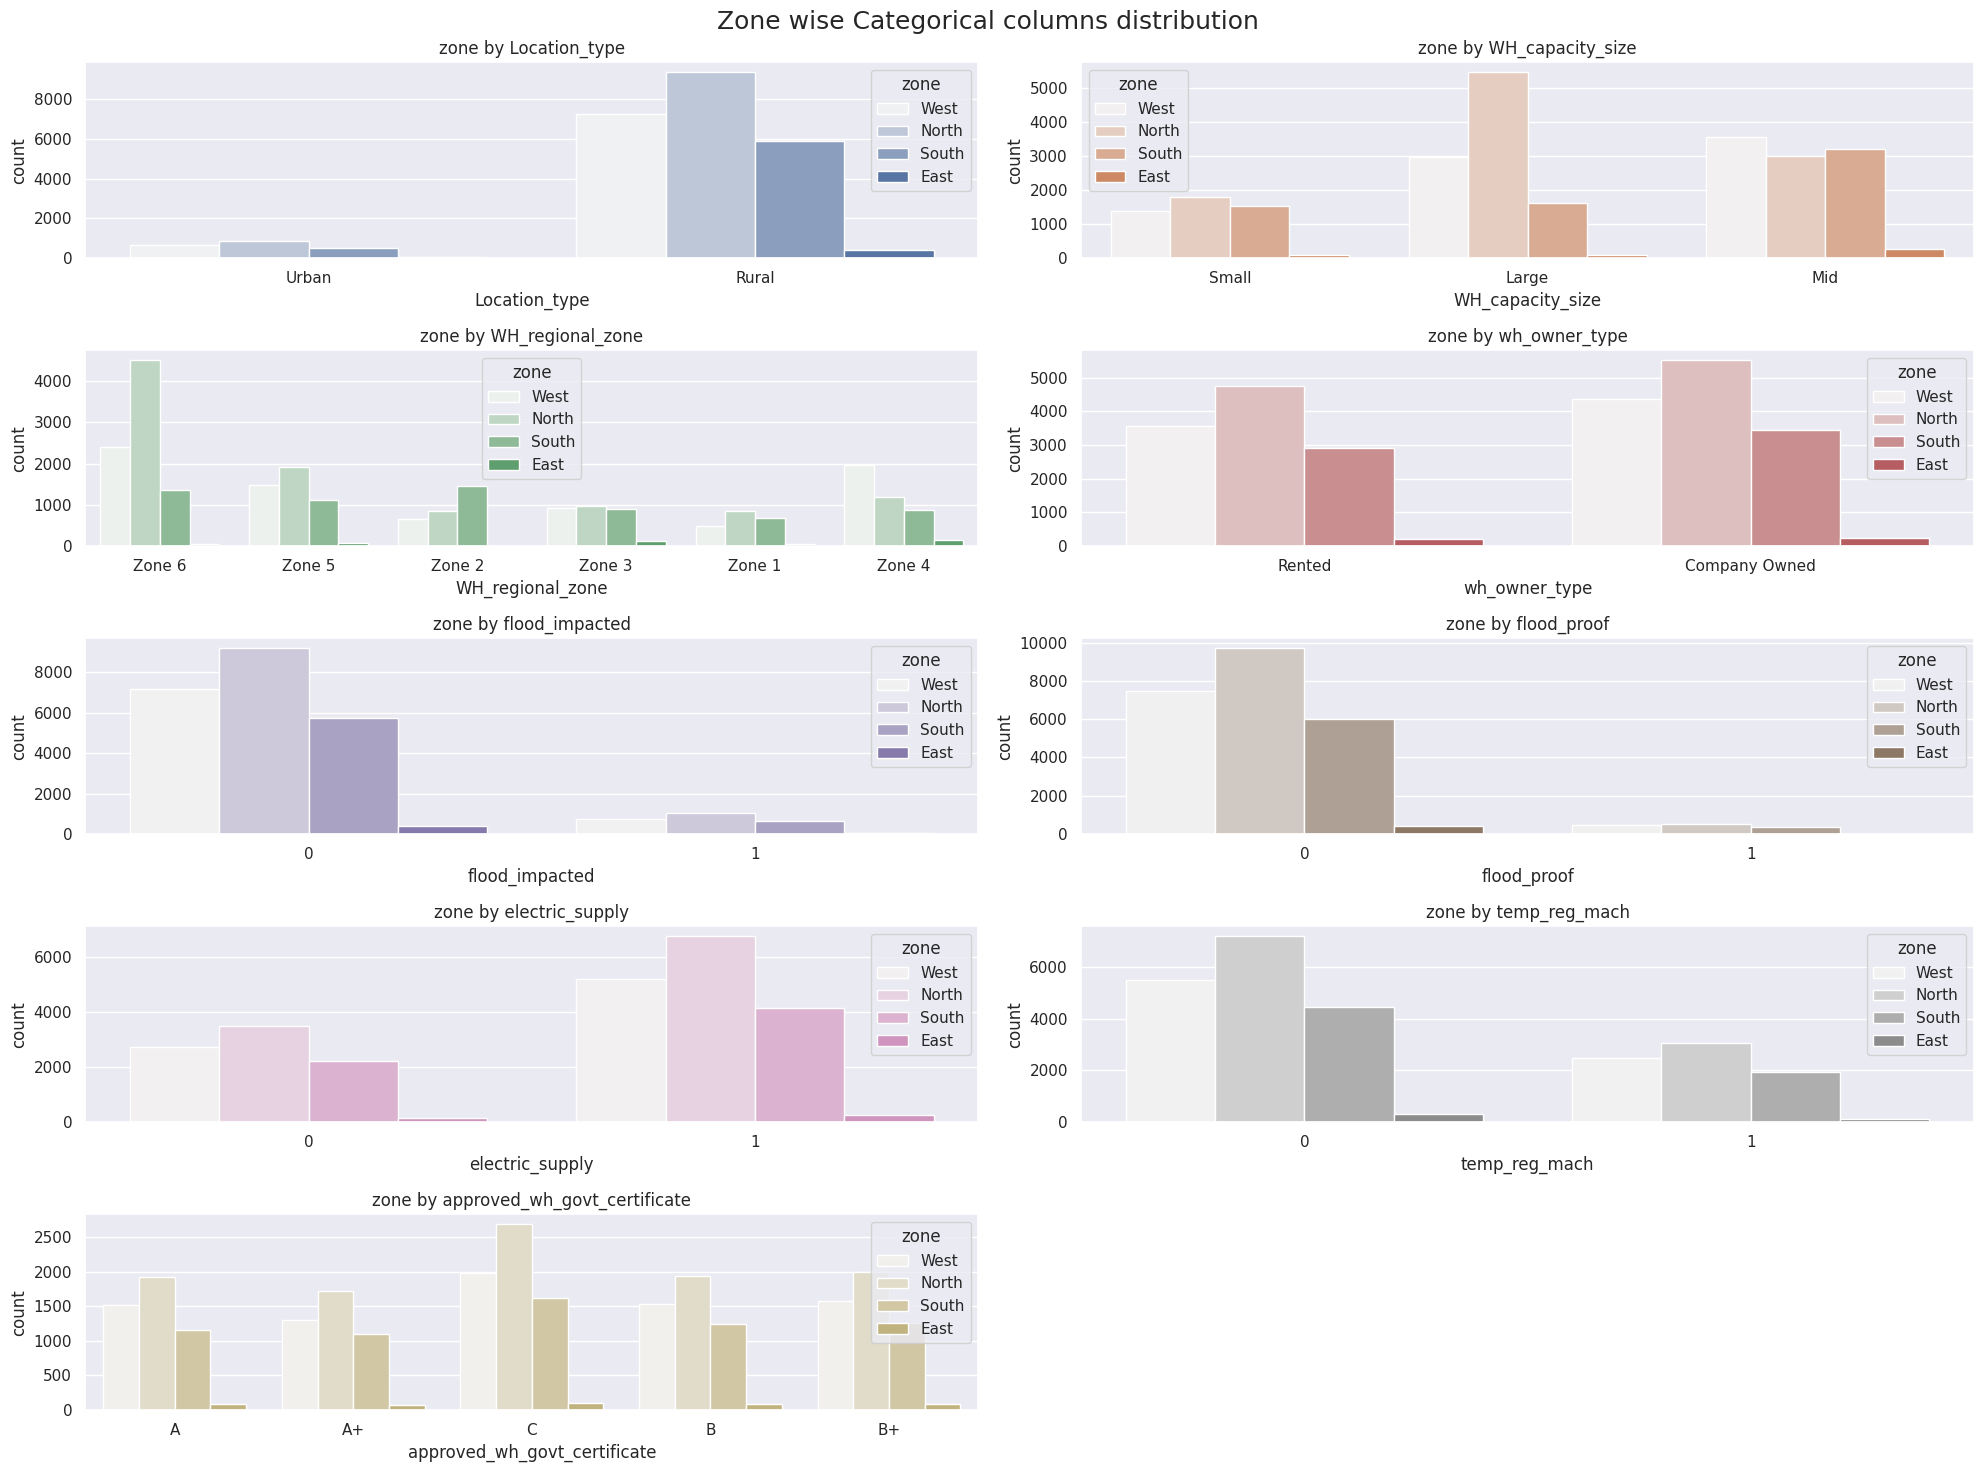

In [ ]:
import itertools
cat_cols=['Location_type', 'WH_capacity_size','WH_regional_zone',
       'wh_owner_type', 'flood_impacted',
       'flood_proof','electric_supply','temp_reg_mach',
       'approved_wh_govt_certificate',
       ]

a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
# set palette
palette = itertools.cycle(sns.color_palette())

fig = plt.figure(figsize = (20,15))
plt.suptitle("Zone wise Categorical columns distribution ", fontsize = 18)

for i in cat_cols:
    plt.subplot(a, b, c)
    plt.title(f'zone by {i}')
    plt.xlabel(i)
    plt.ylabel("count")
    # color
    col = next(palette)
    sns.countplot(data = FMCG_df, x = i, hue = 'zone',color=col)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
#observations
## In all the numerical_cols-highest in north zone, lowest in East zone

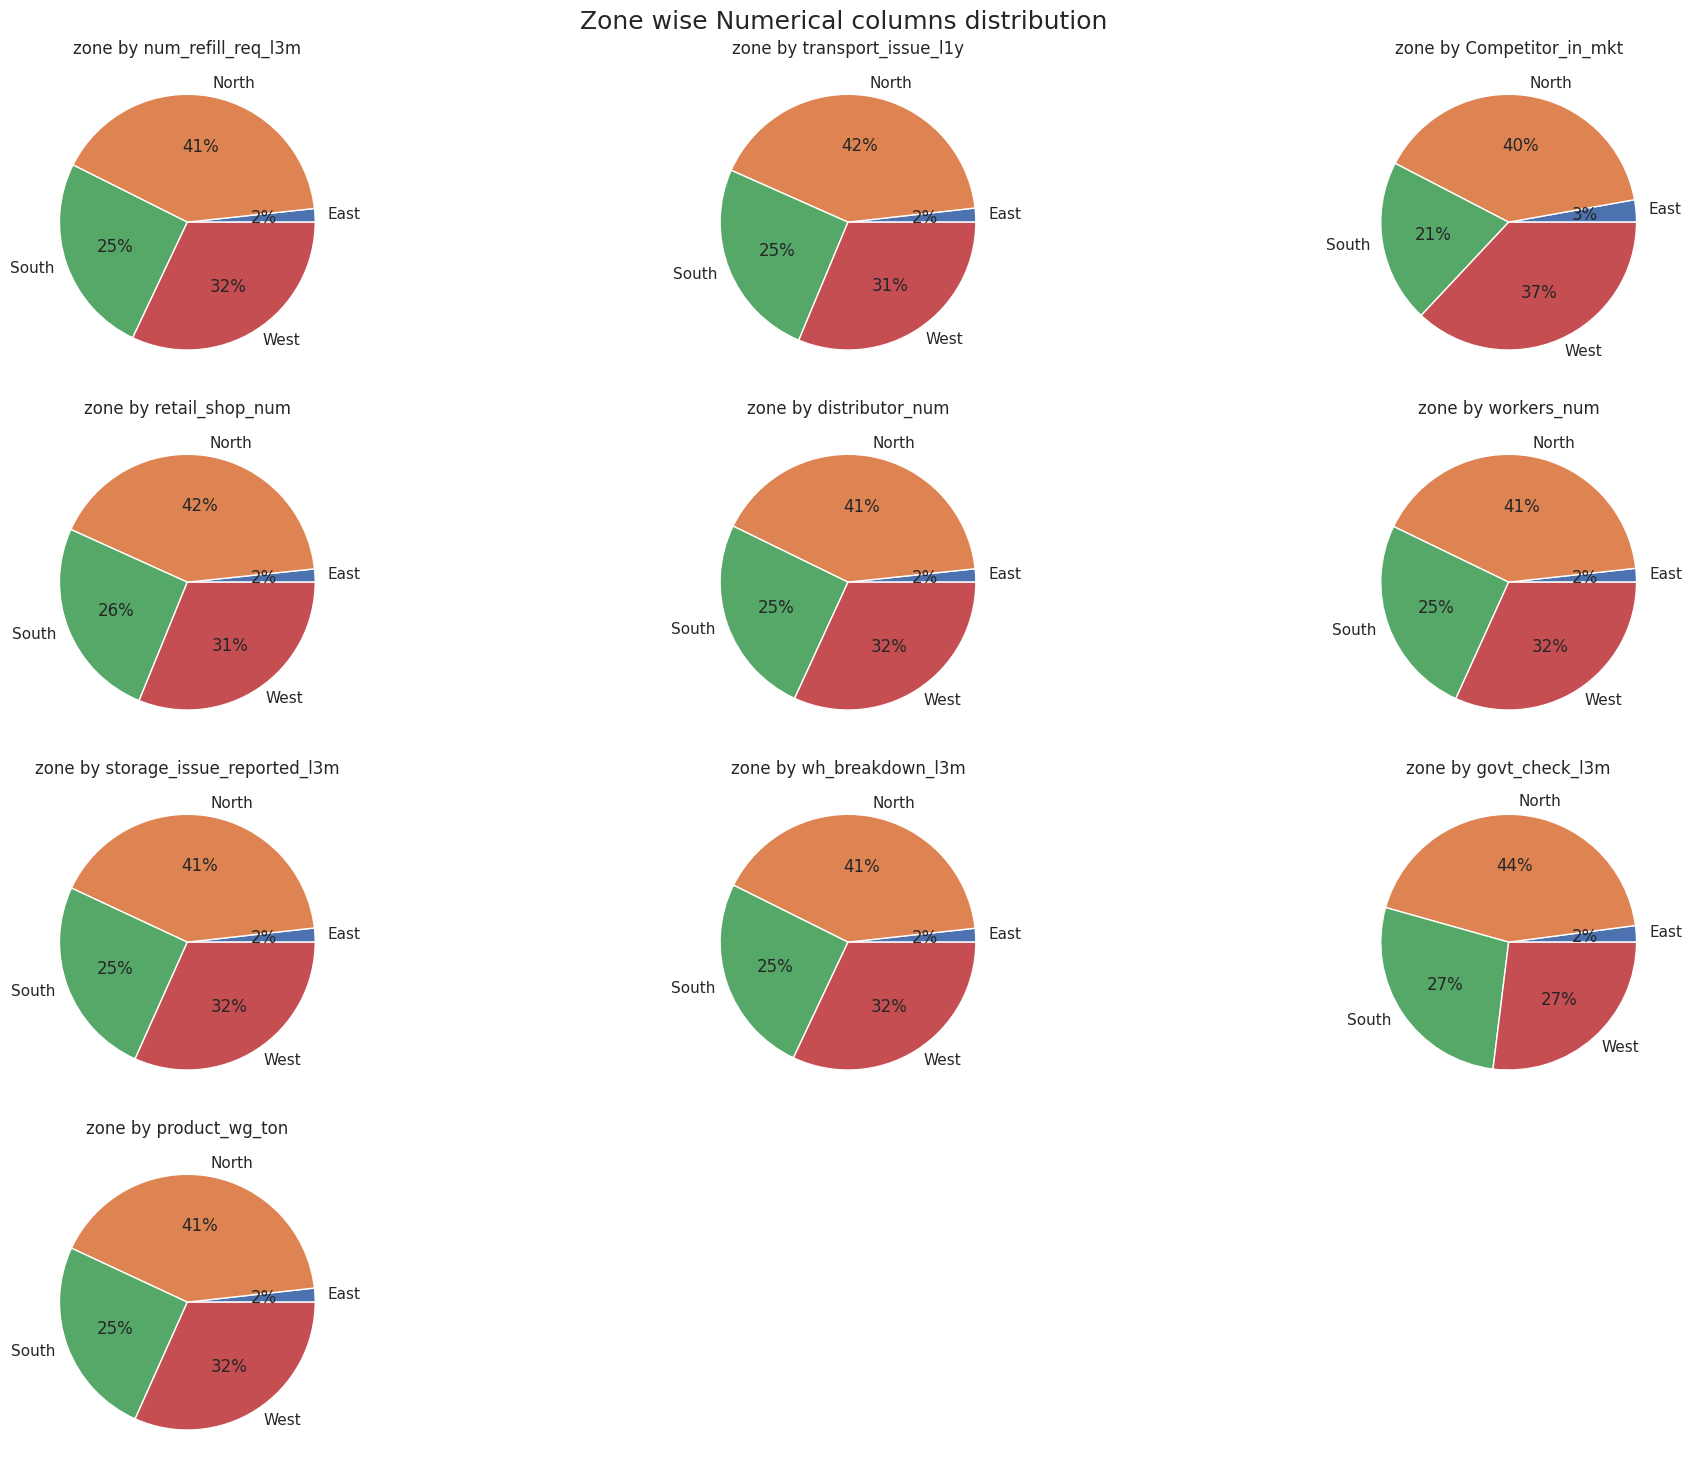

In [ ]:
#  Numerical Data
numerical_cols=['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'workers_num',
       'storage_issue_reported_l3m',
      'wh_breakdown_l3m', 'govt_check_l3m','product_wg_ton'
       ]
#kaggle
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter


fig = plt.figure(figsize = (20,15))
keys=["East","North","South","West"]
for i in numerical_cols:
    plt.subplot(a, b, c)
    plt.title(f'zone by {i}')
    plt.pie(x = FMCG_df.groupby("zone")[i].sum(),labels=keys,autopct='%.0f%%')
    c = c + 1

plt.suptitle("Zone wise Numerical columns distribution ", fontsize = 18)
plt.tight_layout()
plt.show()


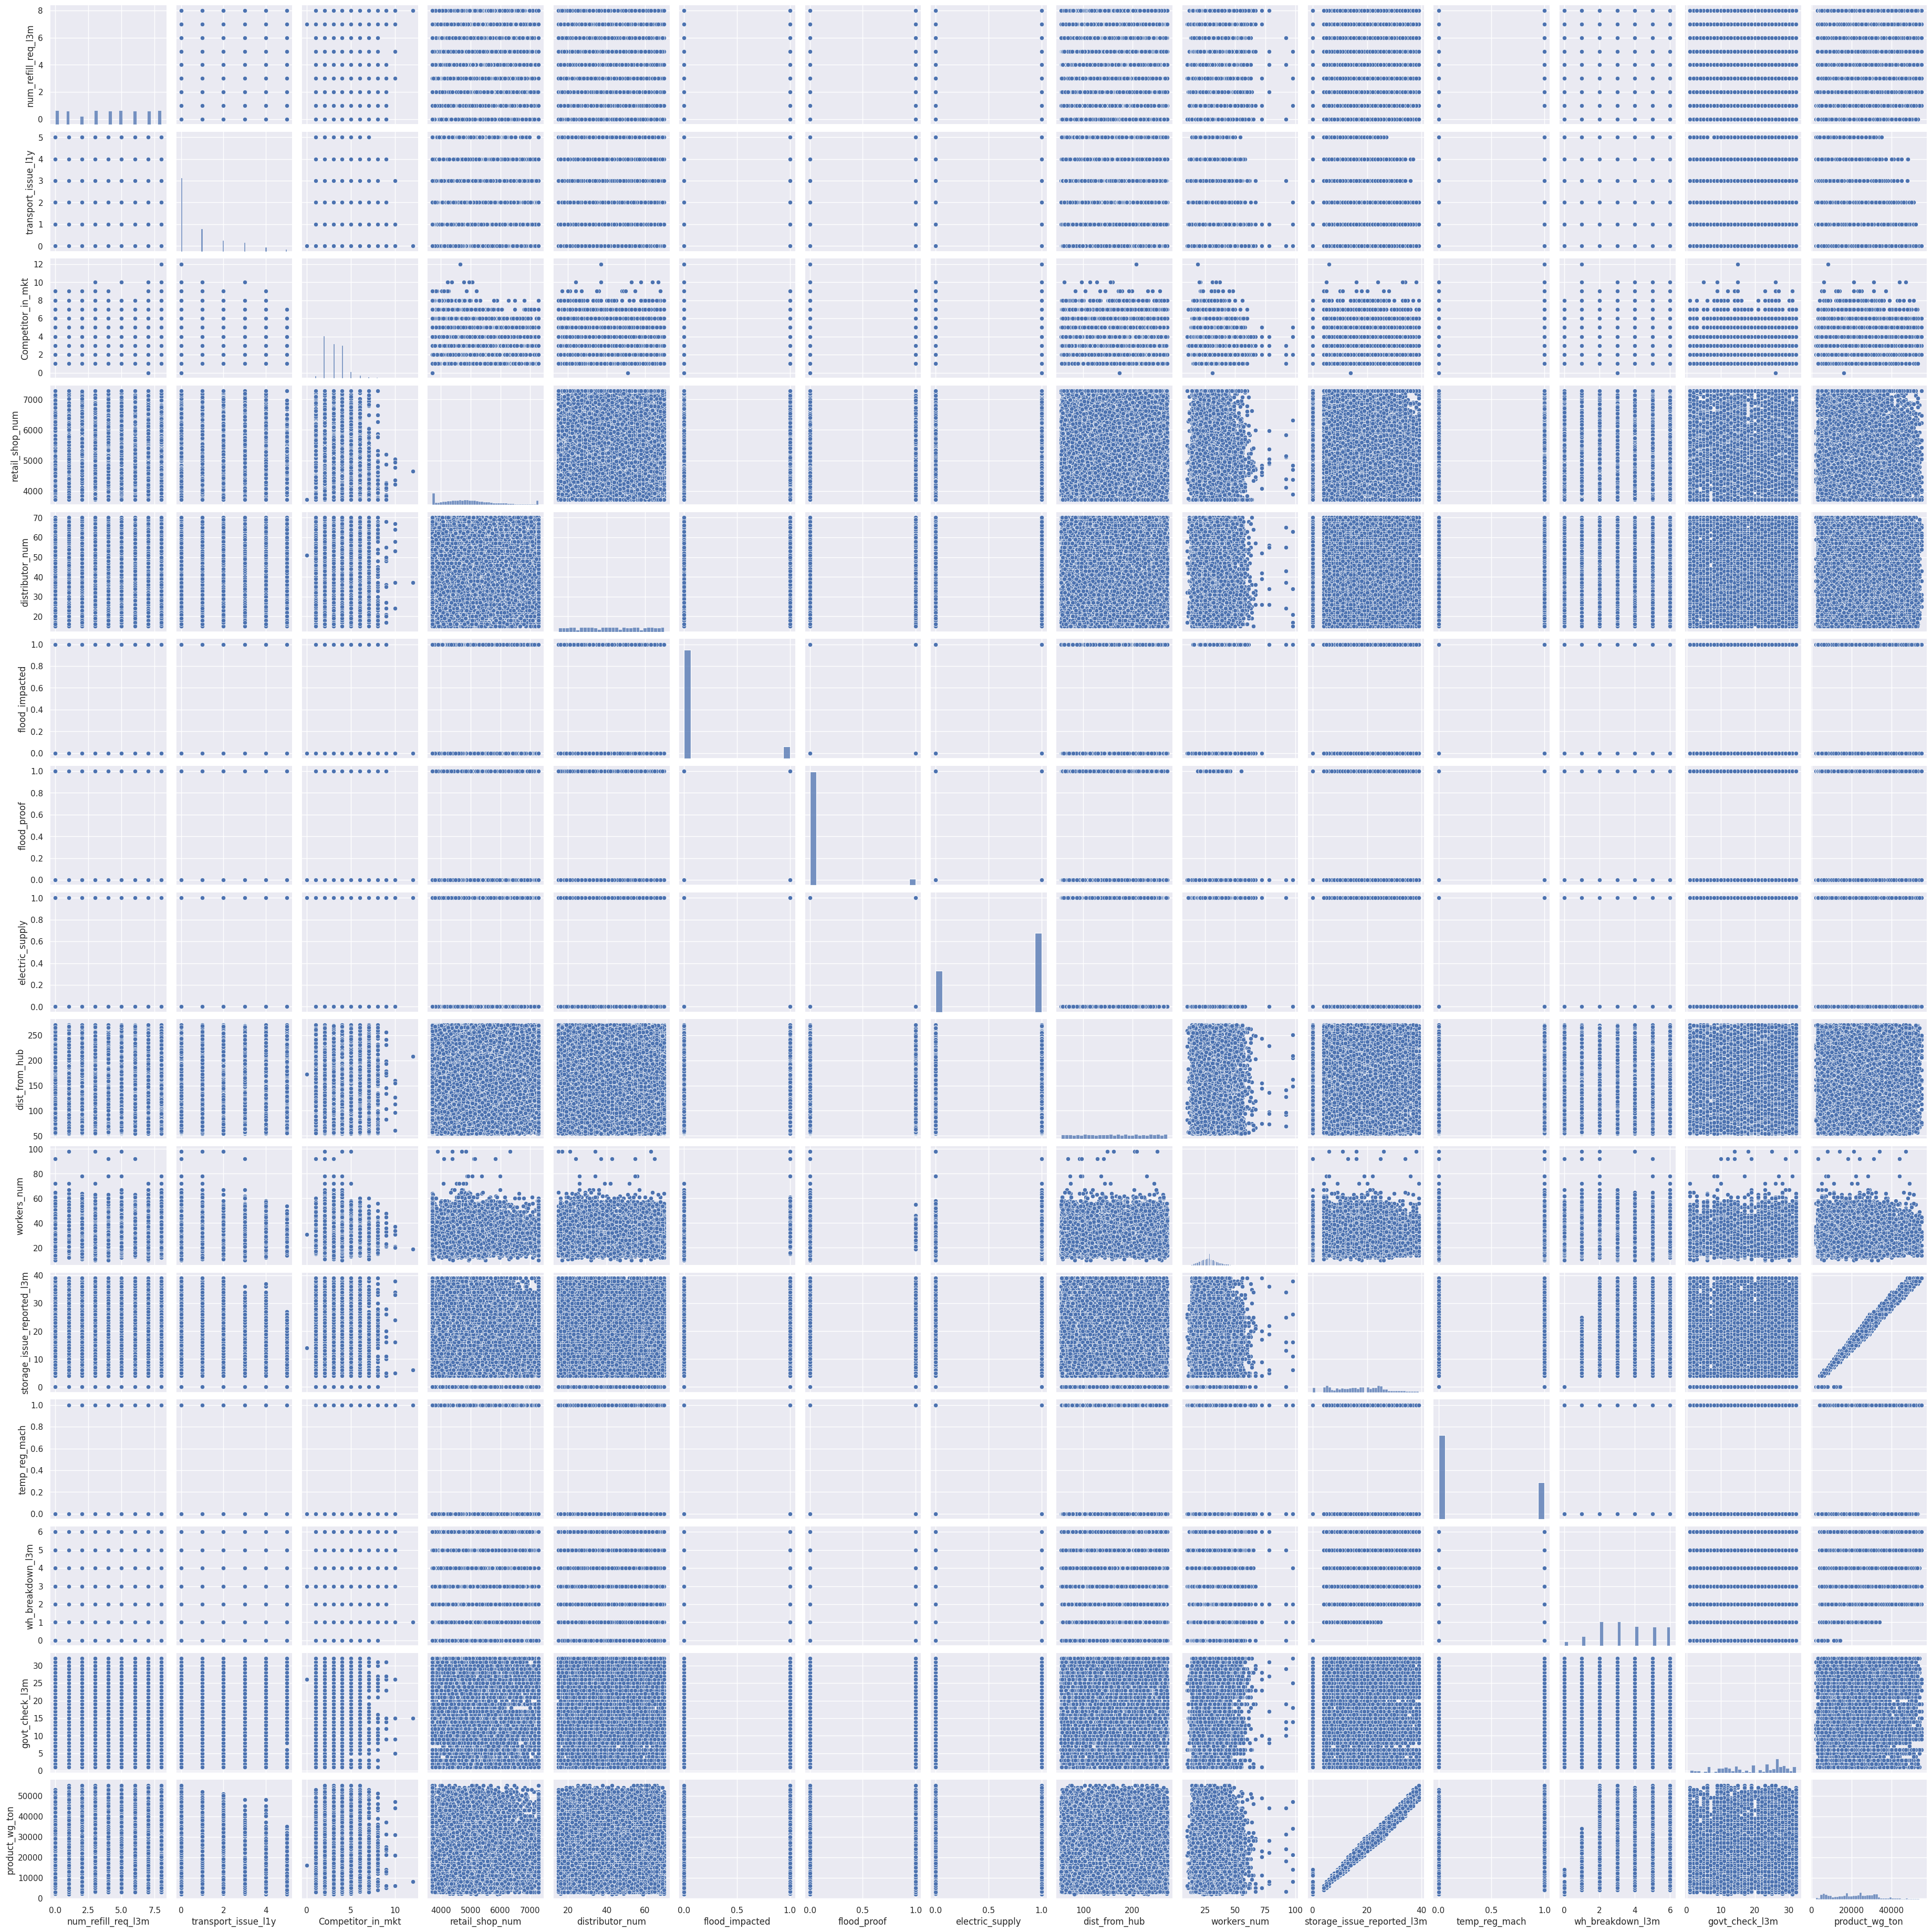

In [ ]:
sns.pairplot(FMCG_df)

<Axes: >

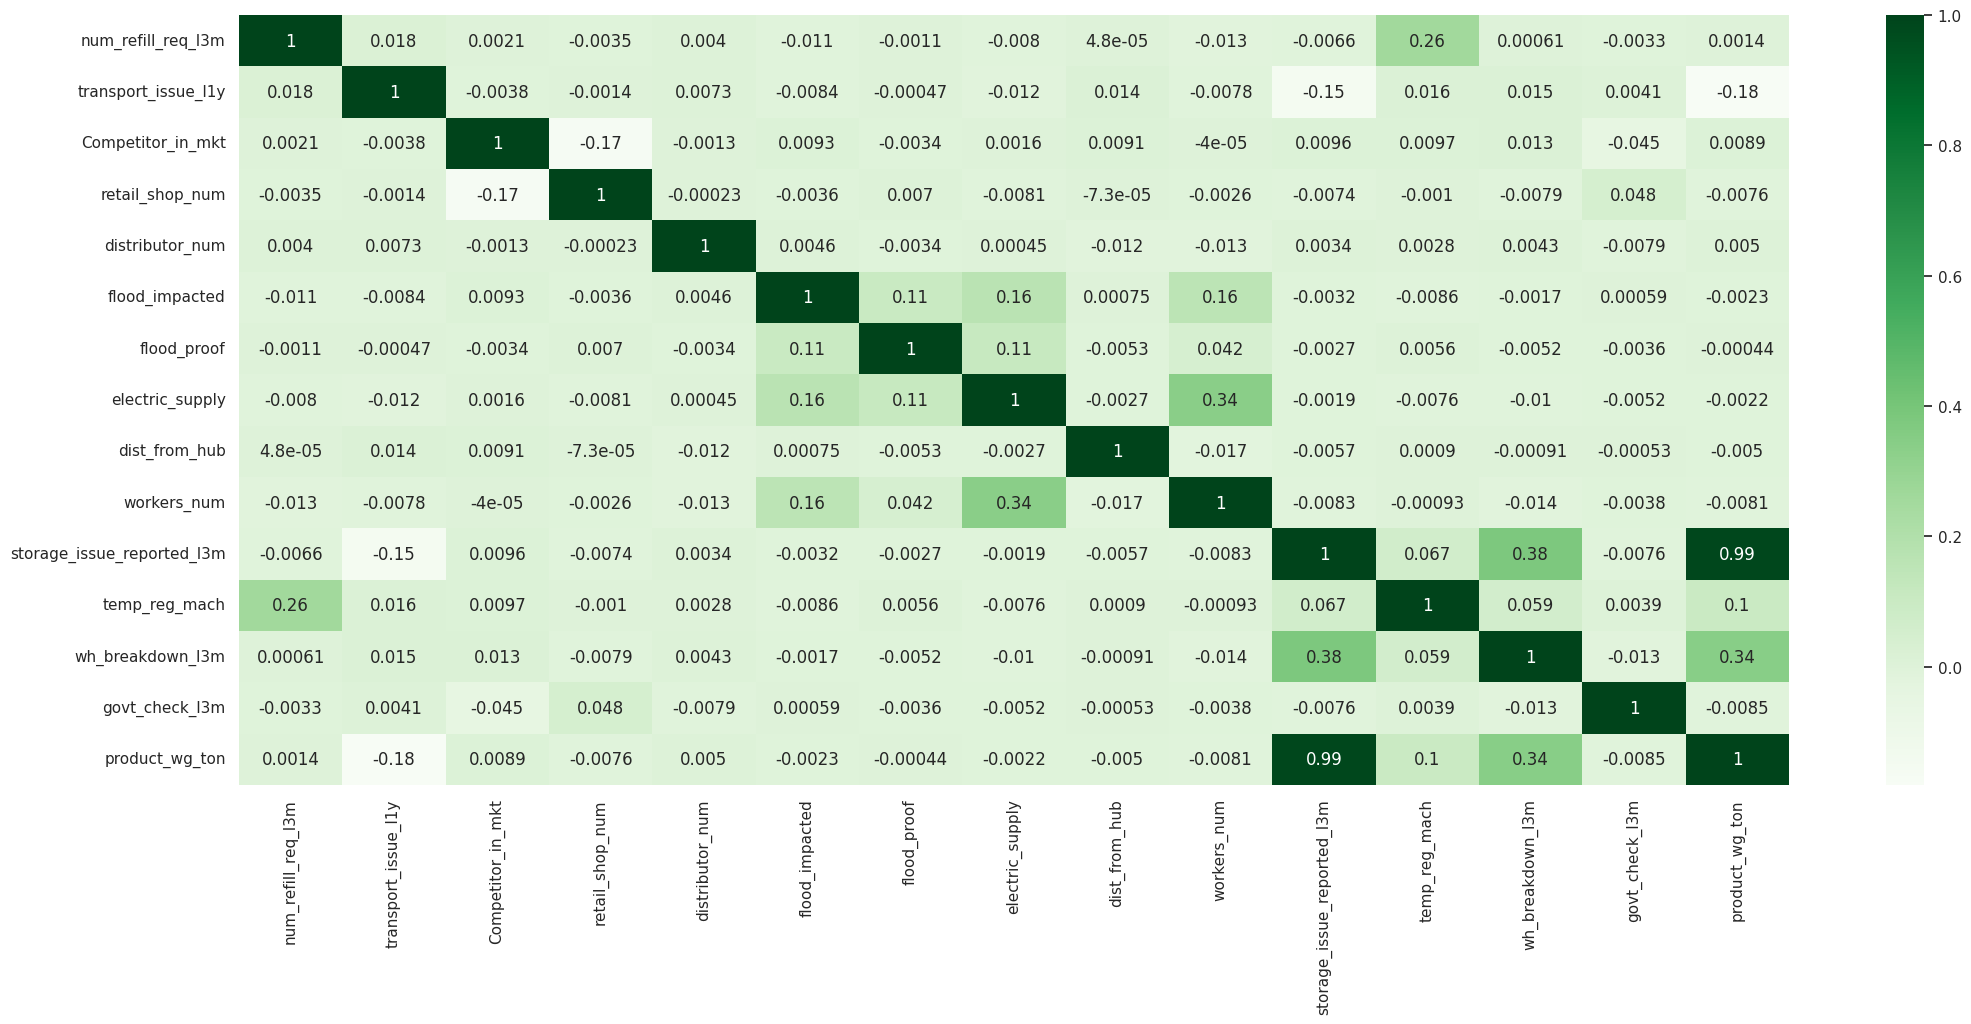

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(FMCG_df.corr(),cmap="Greens",annot=True)

In [ ]:
#Conclusions
#North Zone- due to high no.of transport_issue_l1y, flood_proof','temp_reg_mach',flood_impacted - storage issue occured that leads to high supply as North zone has more no.of retail_shop_num
#East Zone- due to least no.of transport_issue_l1y, flood_proof','temp_reg_mach',flood_impacted- storage issue has not occured that leads to less supply and also East zone has least no.of retail_shop_num

# demand patterns
# North>West>South>East

**Sklearn Libraries**

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer

**Data PreProcessing**

In [ ]:
##Split data into independent, dependent variables
x=FMCG_df.drop(columns=['product_wg_ton'],axis=1)
y=FMCG_df['product_wg_ton']

In [ ]:
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20000, 20) (5000, 20) (20000,) (5000,)


**Encoding**

In [ ]:
transformer=ColumnTransformer(transformers=
                              [
                                ("tr1",OneHotEncoder(sparse=False,drop="first",handle_unknown='ignore'),['Location_type','zone','WH_regional_zone','wh_owner_type']),
                                ("trf2",OrdinalEncoder(categories=[['Small','Mid','Large']]),['WH_capacity_size']),
                                ("trf3",OrdinalEncoder(categories=[['A+','A','B+','B','C']]),['approved_wh_govt_certificate'])


                              ],remainder='passthrough'

                              )
x_train=transformer.fit_transform(x_train)
x_test=transformer.transform(x_test)


In [ ]:
x_train

array([[ 0.,  1.,  0., ...,  0.,  6., 26.],
       [ 0.,  0.,  1., ...,  0.,  0., 32.],
       [ 0.,  0.,  0., ...,  0.,  4.,  6.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  5., 16.],
       [ 0.,  0.,  0., ...,  1.,  3., 19.],
       [ 0.,  0.,  0., ...,  0.,  3., 27.]])

**Feature Scaling**

In [ ]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# # define standard scaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(x)

**Regression Model Building**

**Approach-1 Linear Regression **

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
ln=LinearRegression()
ln.fit(x_train_scaled,y_train)
print("intercepts of the linear model:", ln.intercept_)
print()
print("coefficients of the linear model:",ln.coef_)


intercepts of the linear model: 1704.199052846081

coefficients of the linear model: [-4.44455760e+01  8.15339874e+01  6.81893700e+00  3.67993179e+01
  4.38487126e+00 -2.46558264e+01 -7.78471118e+00  5.01196033e+00
 -5.12657241e+00  1.33006737e+01 -6.86155584e+01 -4.42443331e+02
 -1.51087117e+00 -1.04379815e+03 -7.19887023e+01 -5.63384816e+01
  1.09794166e+02  2.47104797e+01  1.16900525e+02 -2.23881457e+01
  3.95530002e+01 -8.80434036e+00  4.88880766e+04  8.69796961e+02
 -1.41489719e+03 -4.45085632e+01]


In [ ]:
#predictions
y_pred_train_linear=ln.predict(x_train_scaled)
y_pred_test_linear=ln.predict(x_test_scaled)
print(pd.DataFrame(data={"actual":y_test,"pred":y_pred_test_linear}))

       actual          pred
7799    41080  42078.101132
4427    16078  16578.608309
14941   23119  25841.777502
11644    6130   6931.265818
15548    5126   5226.459956
...       ...           ...
20060   18083  16848.670652
12413   12116  12651.149704
10648   17144  14978.465168
598     29129  31724.124885
20324    7121   8410.903852

[5000 rows x 2 columns]


**Approach-2 OLS Method**

In [ ]:
import statsmodels.regression.linear_model as smf
from statsmodels.regression.linear_model import OLS
ols_model=smf.OLS(endog=y_train, exog=x_train_scaled).fit()


In [ ]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         product_wg_ton   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.532e+05
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        18:55:52   Log-Likelihood:                     -1.7788e+05
No. Observations:               20000   AIC:                                  3.558e+05
Df Residuals:                   19974   BIC:                                  3.560e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -42.1053     45.691     -0.922      0.357    -131.664      47.454
x2          1016.7744     66.202     15.359      0.000     887.013    1146.536
x3           966.9855     67.640     14.296      0.000     834.406    1099.565
x4           950.1729     66.305     14.330      0.000     820.209    1080.137
x5           211.5600     61.098      3.463      0.001      91.802     331.318
x6           186.5093     59.739      3.122      0.002      69.416     303.603
x7           202.7980     56.318      3.601      0.000      92.410     313.187
x8           267.0817     71.143      3.754      0.000     127.635     406.528
x9           214.9095     57.349      3.747      0.000     102.501     327.318
x10           50.8447     25.774      1.973      0.049       0.325     101.364
x11         -134.3440     50.328     -2.669      0.008    -232.991     -35.697
x12         -342.6335     36.817     -9.306      0.000    -414.799    -270.468
x13           57.1879     39.441      1.450      0.147     -20.119     134.495
x14        -1006.5811     34.304    -29.343      0.000   -1073.819    -939.343
x15          287.7365     69.970      4.112      0.000     150.590     424.883
x16           46.6617     48.670      0.959      0.338     -48.736     142.059
x17          190.7308     42.283      4.511      0.000     107.853     273.609
x18           22.9109     43.307      0.529      0.597     -61.975     107.797
x19          124.6302     56.331      2.212      0.027      14.216     235.044
x20           15.8766     28.611      0.555      0.579     -40.204      71.957
x21          121.4888     42.373      2.867      0.004      38.435     204.542
x22           65.6185     52.831      1.242      0.214     -37.935     169.172
x23         4.901e+04     58.524    837.365      0.000    4.89e+04    4.91e+04
x24          890.1083     29.441     30.233      0.000     832.401     947.816
x25        -1329.6094     47.904    -27.756      0.000   -1423.506   -1235.713
x26          114.2112     50.105      2.279      0.023      16.001     212.421
==============================================================================
Omnibus:                     6296.929   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35658.473
Skew:                           1.400   Prob(JB):                         0.00
Kurtosis:                       8.912   Cond. No.                         22.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Approach-3**

***a) Lasso regression (L1 regularization)***

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_train_scaled,y_train)
print("lasso model:",lasso.coef_)

lasso model: [-4.30327802e+01  7.36118143e+01 -0.00000000e+00  2.86580286e+01
  4.11252436e+00 -2.34058416e+01 -6.73424389e+00  4.27617472e+00
 -4.39124271e+00  1.29890173e+01 -6.69946025e+01 -4.41935654e+02
 -4.17023526e-01 -1.04332506e+03 -6.91532247e+01 -5.42511685e+01
  1.08700585e+02  2.34337329e+01  1.14880360e+02 -2.20064928e+01
  3.83565756e+01 -7.27457121e+00  4.88854639e+04  8.69234199e+02
 -1.41271999e+03 -4.44503973e+01]


In [ ]:
#predictions
y_pred_train_lasso=lasso.predict(x_train_scaled)
y_pred_test_lasso=lasso.predict(x_test_scaled)
print(pd.DataFrame(data={"actual":y_test,"pred":y_pred_test_lasso}))

       actual          pred
7799    41080  42079.142262
4427    16078  16577.997861
14941   23119  25837.071640
11644    6130   6930.351200
15548    5126   5227.627600
...       ...           ...
20060   18083  16848.617790
12413   12116  12653.020900
10648   17144  14978.784512
598     29129  31722.052683
20324    7121   8410.327567

[5000 rows x 2 columns]


**b) Ridge regression (L2 regularization)**

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.3)
ridge.fit(x_train_scaled,y_train)
print("Ridge model:",lasso.coef_)

Ridge model: [-4.30327802e+01  7.36118143e+01 -0.00000000e+00  2.86580286e+01
  4.11252436e+00 -2.34058416e+01 -6.73424389e+00  4.27617472e+00
 -4.39124271e+00  1.29890173e+01 -6.69946025e+01 -4.41935654e+02
 -4.17023526e-01 -1.04332506e+03 -6.91532247e+01 -5.42511685e+01
  1.08700585e+02  2.34337329e+01  1.14880360e+02 -2.20064928e+01
  3.83565756e+01 -7.27457121e+00  4.88854639e+04  8.69234199e+02
 -1.41271999e+03 -4.44503973e+01]


In [ ]:
#predictions
y_pred_train_ridge=ridge.predict(x_train_scaled)
y_pred_test_ridge=ridge.predict(x_test_scaled)
print(pd.DataFrame(data={"actual":y_test,"pred":y_pred_test_ridge}))

       actual          pred
7799    41080  42072.312429
4427    16078  16582.324492
14941   23119  25840.044169
11644    6130   6936.056950
15548    5126   5228.933629
...       ...           ...
20060   18083  16848.422792
12413   12116  12655.452103
10648   17144  14982.067117
598     29129  31722.465511
20324    7121   8413.206092

[5000 rows x 2 columns]


**C) Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.3,l1_ratio=0.1)
elastic.fit(x_train_scaled,y_train)
print("Elastic model:",elastic.coef_)

Elastic model: [ 5.61740814e+02  7.50007075e+01 -7.99660444e+01 -3.39632171e+01
  1.11267082e+02 -4.72576601e+00  2.81604135e+01 -4.22501364e+01
 -3.50026688e+01  1.27105033e+01  3.64583679e+01 -1.88985034e+03
 -9.45349356e+01 -1.67269768e+03  4.04689581e+01 -5.51053551e+01
  4.63402072e+01 -2.54505417e+01  8.63848978e-01  6.35013147e+00
 -4.47842562e+01 -3.07056243e+01  7.86761513e+03  8.18485901e+02
  2.53688010e+03 -6.37543642e+01]


In [ ]:
#predictions
y_pred_train_elastic=elastic.predict(x_train_scaled)
y_pred_test_elastic=elastic.predict(x_test_scaled)
print(pd.DataFrame(data={"actual":y_test,"pred":y_pred_test_elastic}))

       actual          pred
7799    41080  25538.516125
4427    16078  23031.028414
14941   23119  22962.392846
11644    6130  19284.923150
15548    5126  17082.677549
...       ...           ...
20060   18083  19299.050759
12413   12116  21378.956938
10648   17144  21615.682644
598     29129  24583.175080
20324    7121  18283.739859

[5000 rows x 2 columns]


**Approach-4**

**Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDRegressor
gd_model=SGDRegressor()
gd_model.fit(x_train_scaled,y_train)
print("Gradient Descent:",gd_model.coef_)

Gradient Descent: [-4.11620047e+01  4.84583879e+01  8.18944279e+00  4.25809752e+01
 -9.62327954e+00 -4.16260186e+01 -6.23362705e+00 -2.52043040e+01
 -1.43534307e+00  1.89293101e+00 -7.35646874e+01 -4.59250695e+02
 -7.43238126e+00 -1.05560151e+03 -7.81295502e+01 -6.14174017e+01
  1.06480463e+02  2.48317318e+01  1.11996259e+02 -1.35749740e+01
  4.21023103e+01 -4.31945436e+00  4.87757620e+04  8.64869670e+02
 -1.37867159e+03 -5.08154286e+01]


In [ ]:
#predictions
y_pred_train_gd=gd_model.predict(x_train_scaled)
y_pred_test_gd=gd_model.predict(x_test_scaled)
print(pd.DataFrame(data={"actual":y_test,"pred":y_pred_test_gd}))

       actual          pred
7799    41080  42030.903328
4427    16078  16568.951415
14941   23119  25787.818087
11644    6130   6895.250014
15548    5126   5217.501400
...       ...           ...
20060   18083  16840.300784
12413   12116  12695.234159
10648   17144  15027.954519
598     29129  31658.258345
20324    7121   8452.167177

[5000 rows x 2 columns]


**Approach-5**

**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Dtr_model = DecisionTreeRegressor(random_state=44)
Dtr_model.fit(x_train_scaled, y_train)


DecisionTreeRegressor(random_state=44)

In [ ]:
#predictions
y_pred_train_dtr=Dtr_model.predict(x_train_scaled)
y_pred_test_dtr=Dtr_model.predict(x_test_scaled)
print(pd.DataFrame(data={"actual":y_test,"pred":y_pred_test_dtr}))

       actual     pred
7799    41080  41146.0
4427    16078  16093.0
14941   23119  22151.0
11644    6130   6088.0
15548    5126   5087.0
...       ...      ...
20060   18083  17098.0
12413   12116  12134.0
10648   17144  15151.0
598     29129  31079.0
20324    7121   7064.0

[5000 rows x 2 columns]


**Approach-6**

**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}
Rfr_model=RandomForestRegressor(**params)

Rfr_model.fit(x_train_scaled, y_train)



RandomForestRegressor(max_depth=8, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

In [ ]:
#predictions
y_pred_train_Rfr=Rfr_model.predict(x_train_scaled)
y_pred_test_Rfr=Rfr_model.predict(x_test_scaled)
print(pd.DataFrame(data={"actual":y_test,"pred":y_pred_test_Rfr}))

       actual          pred
7799    41080  40986.608206
4427    16078  16289.480552
14941   23119  23250.021808
11644    6130   5955.466531
15548    5126   5141.665629
...       ...           ...
20060   18083  18008.066782
12413   12116  12123.583758
10648   17144  16015.377892
598     29129  29408.601806
20324    7121   7158.617541

[5000 rows x 2 columns]


**Accuracy of the models - R2_score**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

**Test Accuracy's of all the models**

In [ ]:
#RandomForestRegressor- Accuracy is good
print("linear model testing score: ",r2_score(y_test,y_pred_test_linear))
print("Lasso testing score: ",r2_score(y_test,y_pred_test_lasso))
print("Ridge testing score: ",r2_score(y_test,y_pred_test_ridge))
print("Elastic testing score: ",r2_score(y_test,y_pred_test_elastic))
print("Gradient descent testing score: ",r2_score(y_test,y_pred_test_gd))
print("DecisionTreeRegressor testing score: ",r2_score(y_test,y_pred_test_dtr))
print("RandomForestRegressor testing score: ",r2_score(y_test,y_pred_test_Rfr))

linear model testing score:  0.9779913890710528
Lasso testing score:  0.9779916983032659
Ridge testing score:  0.9779900618301254
Elastic testing score:  0.35295008106579917
Gradient descent testing score:  0.9779821001419494
DecisionTreeRegressor testing score:  0.9872792351355848
RandomForestRegressor testing score:  0.9934013051173116


**Train Accuracy's of all the models**

In [ ]:
print("linear model training score: ",r2_score(y_train,y_pred_train_linear))
print("Lasso training score: ",r2_score(y_train,y_pred_train_lasso))
print("Ridge training score: ",r2_score(y_train,y_pred_train_ridge))
print("Elastic training score: ",r2_score(y_train,y_pred_train_elastic))
print("Gradient descent training score: ",r2_score(y_train,y_pred_train_gd))
print(" DecisionTreeRegressor training score: ",r2_score(y_train,y_pred_train_dtr))
print(" RandomForestRegressor training score: ",r2_score(y_train,y_pred_train_Rfr))

linear model training score:  0.9770749394870131
Lasso training score:  0.9770749098204136
Ridge training score:  0.9770748483177212
Elastic training score:  0.35818408221259224
Gradient descent training score:  0.977065153449593
 DecisionTreeRegressor training score:  1.0
 RandomForestRegressor training score:  0.9936495226570813


**Performance Metrics**

In [ ]:
print("MAE",metrics.mean_absolute_error(y_test,y_pred_test_Rfr))
print("MAPE",metrics.mean_absolute_error(y_test,y_pred_test_Rfr)/100)
print("MSE",metrics.mean_absolute_percentage_error(y_test,y_pred_test_Rfr))
print("RMSE",np.sqrt(metrics.mean_absolute_percentage_error(y_test,y_pred_test_Rfr)))

MAE 706.7406215966691
MAPE 7.067406215966692
MSE 0.04432855361314179
RMSE 0.21054347202689944


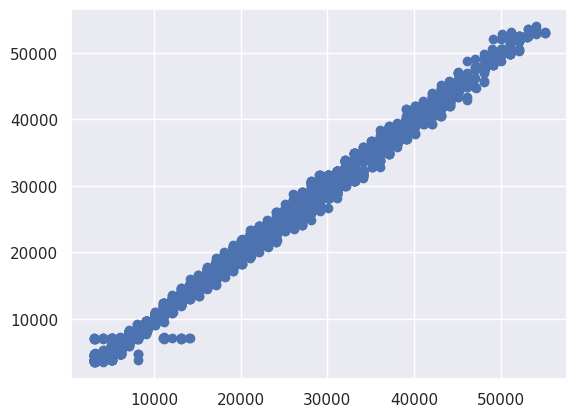

In [ ]:
#check linearity
plt.scatter(x=y_test,y=y_pred_test_Rfr)